<a href="https://colab.research.google.com/github/gcgrossi/colorsaur/blob/master/colorsaur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#***COLORSAUR - Stupid Color Gradients***
*a class by: Giulio Cornelio Grossi, giulio.cornelio.grossi@gmail.com*

  <img src='https://drive.google.com/uc?id=1GDp-mwP8r1-8pyX8ZmLxA7Ol2IB9WPor' width="600px">



#***Description***
###*The class implements very simple gradients using the RGB space and some simple linear algebra.For the moment only a Color Gradient between two color is developed*. <br><br>

##***Basic Math***

A color can be expressed as a vector in a 3D $(r,g,b)$ space where $r,g,b \in [0,255]$ are integer numbers.<br><br>

 <img src='https://drive.google.com/uc?id=16AtdYYoo9F9t6mFg76ZPi2jo6CeGzNfK' width="400px">

In order to find the possible colors that fall between a pair $[\bar{c_1}=(r_1,g_1,b_1),\bar{c_2}=(r_2,g_2,b_2)]$ we need to find the line connecting $\bar{c_1}$ and $\bar{c_2}$. In this case we will have a 'simple' linear gradient.<br><br>

First of all we compute the 'director vector' which gives the direction of this line. This is easily the difference between $\bar{c_1}$ and $\bar{c_2}$. $\bar{v_d}=\bar{c_1}-\bar{c_2}$. <br><br>

 <img src='https://drive.google.com/uc?id=1RCp3L_xSMpfqWAzff_bmOvjeC9pmGExG' width="300px">

If we now multiply $\bar{v_d}$ by a parameter $t$ we find the parametric equation of the line in the direction connecting $\bar{c_1}$ and $\bar{c_2}$: $\bar{c_0}=\bar{v_d}t$. This line however passed through the origin, and we have to shift it to let it pass through $\bar{c_1}$. <br><br>

The desired equation is therefore:<br>
 $\bar{c}=\bar{v_d}t+\bar{c_1}$
<br><br>

Note that:<br>
 $t=0 \Rightarrow \bar{c}=\bar{c_1}$<br>
 $t=-1 \Rightarrow \bar{c}=\bar{c_2}$<br><br>

 So that if we want to find the gradient colors we have to vary $t$ in the range $[-1,0]$


##***Usage***

***Gradient_2c()*** <br>class: inizialized by giving as input 2 color in hex format.

***.pick_color(index)*** mehod: pick up a color in the gradient. Here ***index*** is a value between $[-1,0]$. Return a tuple in (r,g,b) format.

***.get_gradient(depth)*** mehod: You can pick up the entire gradient. The method returns an array of (r,g,b) tuples of length equal to the ***depht*** parameter.

#***Gradient_2c Class***

In [ ]:
import math

class Gradient_2c:
  def __init__(self, c1_hex, c2_hex):
    
    # init hex colors
    self.c1_hex = c1_hex
    self.c2_hex = c2_hex
    
    # convert hex -> rgb
    h=c1_hex.lstrip('#')
    self.c1_rgb=tuple(int(h[i:i+2], 16) for i in (0, 2, 4))
    h=c2_hex.lstrip('#')
    self.c2_rgb=tuple(int(h[i:i+2], 16) for i in (0, 2, 4))

    # create the director vector in rgb space
    self.cd_rgb=tuple(map(lambda i, j: i - j, self.c1_rgb, self.c2_rgb))
  

  def pick_color(self, idx):
    
    # use the director vector to pick a particular color in the gradient
    pc=tuple(map(lambda i, j: round((i + idx*j)/255,2), self.c1_rgb, self.cd_rgb))
    self.picked_color=tuple(map(lambda x: x if x<1 else 1, pc))
    self.picked_color=tuple(map(lambda x: x if x>0 else 0, self.picked_color))

    return self.picked_color
  
  
  def get_gradient(self, depht):
    
    grad=[]

    for i in range(0,depht):
      grad.append(self.pick_color(-i/depht))
    
    return grad



##***Example***

In [ ]:
def hex_to_rgb(h):
  # convert hex -> rgb
  h=h.lstrip('#')
  rgb=tuple(int(h[i:i+2], 16) for i in (0, 2, 4))
  return tuple(map(lambda i: i/255, rgb))

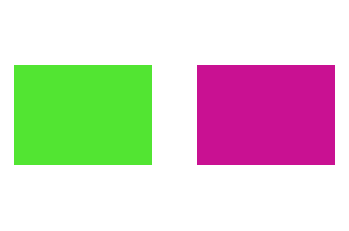

In [ ]:
#### Chose two colors
color_1='#52e532'
color_2='##c91192'

#### Plot the Chosen Colors 
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2)
axs[0].hlines(1,1,2,color=hex_to_rgb(color_1),linewidth=100)
axs[1].hlines(1,1,2,color=hex_to_rgb(color_2),linewidth=100)
axs[0].set_axis_off()
axs[1].set_axis_off()
plt.show()

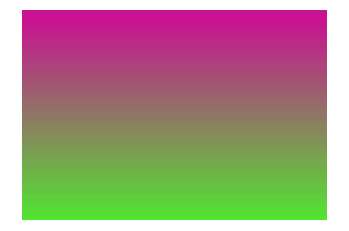

In [ ]:

#### Get the Gradient values in array
g = Gradient_2c(color_1,color_2)
g_col=g.get_gradient(100)

fig, ax = plt.subplots()
for i in range(0,100):
  ax.hlines(i+1,1,2,color=g_col[i],linewidth=12)
  ax.set_axis_off()
plt.show()

#***Gradient_3c Class***

In [ ]:
class Gradient_3c:
  def __init__(self, c1_hex, c2_hex, c3_hex):
    
    # init hex colors
    self.c1_hex = c1_hex
    self.c2_hex = c2_hex
    self.c3_hex = c3_hex
    
    # convert hex -> rgb
    h=c1_hex.lstrip('#')
    self.c1_rgb=tuple(int(h[i:i+2], 16) for i in (0, 2, 4))
    h=c2_hex.lstrip('#')
    self.c2_rgb=tuple(int(h[i:i+2], 16) for i in (0, 2, 4))
    h=c3_hex.lstrip('#')
    self.c3_rgb=tuple(int(h[i:i+2], 16) for i in (0, 2, 4))

    # create the director vectors in rgb space
    self.cd1_rgb=tuple(map(lambda i, j: i - j, self.c1_rgb, self.c2_rgb))
    self.cd2_rgb=tuple(map(lambda i, j: i - j, self.c2_rgb, self.c3_rgb))

  def pick_color(self, idx):
    
    pc = []
    index = math.trunc(idx)
    idx = idx-index

    # use the director vector to pick a particular color in the gradient
    pc.append(tuple(map(lambda i, j: round((i + idx*j)/255,2),   self.c1_rgb, self.cd1_rgb)))
    pc.append(tuple(map(lambda i, j: round((i + idx*j)/255,2),   self.c2_rgb, self.cd2_rgb)))
    
    self.picked_color = pc[abs(index)]

    return self.picked_color
  
  
  def get_gradient(self, depht):
    
    grad=[]

    for i in range(0,2*depht):
      grad.append(self.pick_color(-i/depht))
    
    return grad[::2]



#***Gradient_Nc Class***

In [ ]:
#############################################################################
class Gradient_Nc:
  def __init__(self, c_hex):
    
    self.c_hex  = []
    self.c_rgb  = []
    self.cd_rgb = []
    
    for c in c_hex: 
      
      # init hex colors
      self.c_hex.append(c)

      # convert hex -> rgb colors
      h   = c.lstrip('#')
      rgb = tuple(int(h[i:i+2], 16) for i in (0, 2, 4))
      self.c_rgb.append(rgb)


    # create the director vectors in rgb space
    for c in range(1,len(c_hex)): 
      rgb=tuple(map(lambda i, j: i - j, self.c_rgb[c-1], self.c_rgb[c]))
      self.cd_rgb.append(rgb)


  #############################################################################
  def pick_color(self, idx):
    
    pc = []
    index = math.trunc(idx)
    idx = idx-index

    for c in range(0,len(self.cd_rgb)):
      # use the director vector to pick a particular color in the gradient
      pc.append(tuple(map(lambda i, j: round((i + idx*j)/255,2), self.c_rgb[c], self.cd_rgb[c])))
    
    
    self.picked_color = pc[abs(index)]

    return self.picked_color
  

  #############################################################################
  def get_gradient(self, depht):
    
    grad=[]
    len_depht = len(self.cd_rgb)

    for i in range(0,len_depht*depht):
      grad.append(self.pick_color(-i/depht))
    
    return grad[::len_depht]



#***Preformed Palettes***

In [ ]:
def palettes() :
    
    p = {'Facebook'      : [ '#3b5998','#8b9dc3','#dfe3ee','#f7f7f7','#ffffff'],
         'Gryffindor'    : [ '#740001','#ae0001','#eeba30','#d3a625','#000000'],
         'Instagram'     : [ '#feda75','#fa7e1e','#d62976','#962fbf','#4f5bd5'],
         'Palette of Red': [ '#ff9494','#ff5c5c','#ec3939','#c70d0d','#ab0000'],
         'Mochi Petrei'  : [ '#cebaff','#e6dcff','#ffbef6','#ffe4ff','#f9ffca'],
         'Dusty Purples' : [ '#b687ff','#dca9ff','#d3b8ff','#dfc7ff','#f1e8ff']
    }
    
    return p

def list_palettes() :
    
    p=palettes()
    
    print('\nThis is the list of available palettes:\n')
    for k in p.keys():
        print(k);
    
    return



############################################################################
class Palette:
  def __init__(self,pname):
    
    self.palette_dic = palettes()
    self.palette  = self.palette_dic[pname]


  #############################################################################
  def get_palette(self):
    return self.palette
  

  #############################################################################
  def pick_color(self, idx):
    
    pc = []
    index = math.trunc(idx)
    idx = idx-index

    for c in range(0,len(self.cd_rgb)):
      # use the director vector to pick a particular color in the gradient
      pc.append(tuple(map(lambda i, j: round((i + idx*j)/255,2), self.c_rgb[c], self.cd_rgb[c])))
    
    
    self.picked_color = pc[abs(index)]

    return self.picked_color


  #############################################################################
  def get_gradient(self,depht):
    self.c_hex  = self.palette
    self.c_rgb  = []
    self.cd_rgb = []
    
    for c in self.c_hex: 
      # convert hex -> rgb colors
      h   = c.lstrip('#')
      rgb = tuple(int(h[i:i+2], 16) for i in (0, 2, 4))
      self.c_rgb.append(rgb)


    # create the director vectors in rgb space
    for c in range(1,len(self.c_hex)): 
      rgb=tuple(map(lambda i, j: i - j, self.c_rgb[c-1], self.c_rgb[c]))
      self.cd_rgb.append(rgb)

    #pick colors in gradient
    grad=[]
    len_depht = len(self.cd_rgb)

    for i in range(0,len_depht*depht):
      grad.append(self.pick_color(-i/depht))
    
    return grad[::len_depht]


#***Plotting the Available palettes***

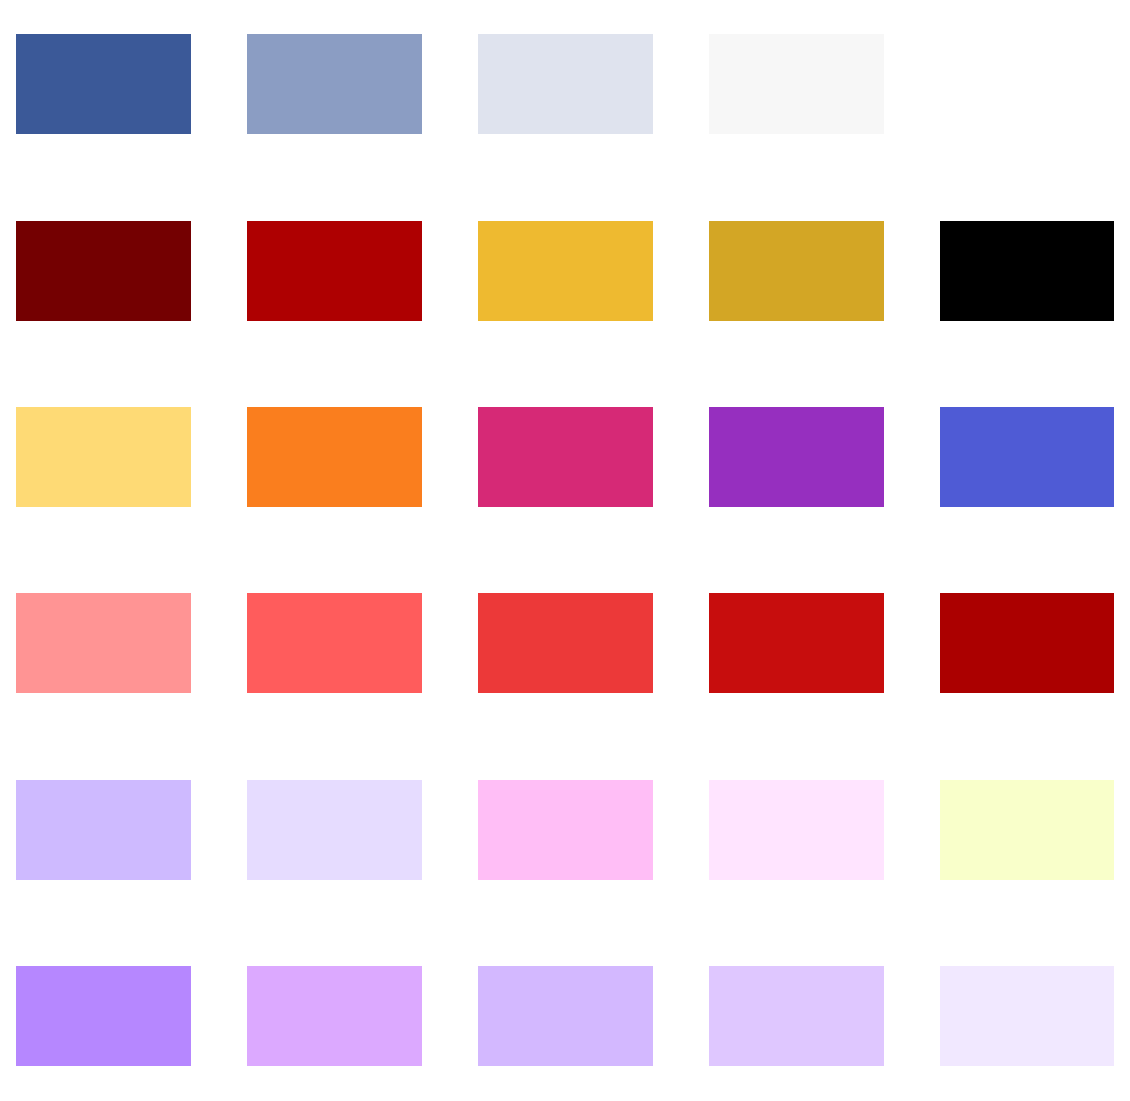

In [ ]:
p_dic=palettes()

names = []
cols = []

for k in p_dic.keys():
  names.append(k)
  cols.append(p_dic[k])

#### Showing the chosen colors
fig, axs = plt.subplots(len(names),len(cols[0]),figsize=(20,20))
for i in range(0,len(names)):
  for j in range(0,len(cols[i])):
    axs[i][j].hlines(1,1,2,color=hex_to_rgb(cols[i][j]),linewidth=100)
    axs[i][j].set_axis_off()
plt.show()




#***Example using Matplotlib***

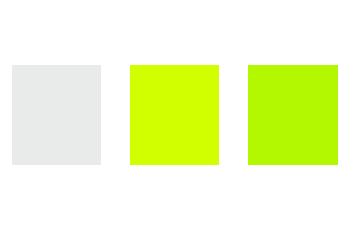

In [ ]:
#### Chose colors
color_1 = '#e9ebea'
color_2 = '#d2ff00'
color_3 = '#b3f700'
color_4 = '#00c41f'
color_5 = '#1d3752'

#### Plot the Chosen Colors 
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,3)
axs[0].hlines(1,1,2,color=hex_to_rgb(color_1),linewidth=100)
axs[1].hlines(1,1,2,color=hex_to_rgb(color_2),linewidth=100)
axs[2].hlines(1,1,2,color=hex_to_rgb(color_3),linewidth=100)
axs[0].set_axis_off()
axs[1].set_axis_off()
axs[2].set_axis_off()
plt.show()

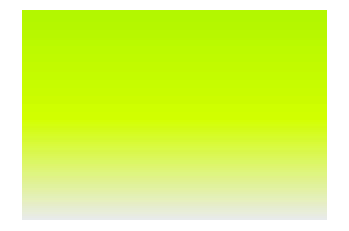

In [ ]:

#### Get the Gradient values in array
g3c = Gradient_3c(color_1,color_2,color_3)
g3c_col=g3c.get_gradient(100)

fig, ax = plt.subplots()
for i in range(0,100):
  ax.hlines(i+1,1,2,color=g3c_col[i],linewidth=12)
  ax.set_axis_off()
plt.show()

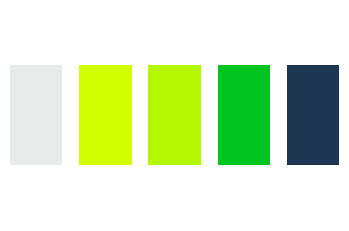

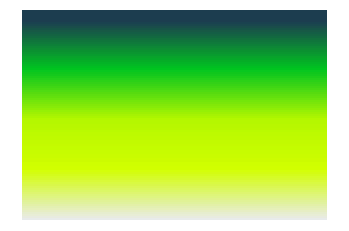

In [ ]:

v_color = [color_1,color_2,color_3,color_4,color_5]

#### Showing the chosen colors
fig, axs = plt.subplots(1,len(v_color))
for i in range(0,len(v_color)):
  axs[i].hlines(1,1,2,color=hex_to_rgb(v_color[i]),linewidth=100)
  axs[i].set_axis_off()
plt.show()

#### Get the Gradient values in array
g3c = Gradient_Nc(v_color)
g3c_col=g3c.get_gradient(100)

#### Plotting the Gradient
fig, ax = plt.subplots()
for i in range(0,100):
  ax.hlines(i+1,1,2,color=g3c_col[i],linewidth=12)
  ax.set_axis_off()
plt.show()

#***Example Using Plotly***

In [ ]:
import numpy as np
import plotly.express as px
array = np.zeros([100, 100, 3], dtype=np.uint8)

grad =  np.asarray(g3c_col)*255

i=0
for c in grad:
  array[99-i,:] = c
  i=i+1

fig = px.imshow(array)
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
fig.show()